# Tarea 4. Métodos Computacionales.

## Métodos de integración numérica.


En esta sección se implementaron 3 métodos de integración numérica: Regla del Trapecio, Regla de Simpson y Cuadratura de Gauss y se contrastan con el resultado obtenido de la integración análitica de funciones conocidas. 

### Solución analítica de dos integrales muestra.
Para probar la implementación de los métodos se les compara con el resultado obtenido analíticamente,como se muestra a continuación. 

#### Integral 1. 
Integrando por partes.

\begin{equation}
\begin{split}
    \int_{0}^{1} x cos(x) dx &= \left[xsin(x)\right]_0^1  - \int_{0}^{1} sin(x)dx \\
               &= sin(1) - \int_{0}^{1} sin(x)dx \\
               &= sin(1) + \left[cos(x)\right]_0^1\\
               &= sin(1) + cos(1) - cos(0) \\
               &= sin(1) + cos(1) - 1
\end{split}               
\end{equation}


#### Integral 2.
La segunda integral que se resuelve analíticamente es:


\begin{equation}
 \begin{split}
    \int_{0}^{3} (x^2 + 5x)) dx &= \int_{0}^{3} x^2 dx + \int_{0}^{3} 5x dx\\
     &= \left[\frac{x^3}{3}\right]_0^3 + 5\left[\frac{x^2}{2}\right]_0^3  
      = 9 + \frac{45}{2} \\
     &= \frac{63}{2}
 \end{split}
\end{equation}


### Implementación de los métodos.
A continuación se presentan las implementaciones de los tres métodos y el cálculo del error porcentual relativo a la solución analítica, para cada uno.

In [1]:
# Regla del trapecio,
# f la función, a,b los límites de integración, n el número de puntos/trapecios.
import numpy as np
import matplotlib.pyplot as plt

def trapecio(f, a, b, n): 
    h = float(b - a) / n
    s = 0.0
    s += f(a)/2.0
    for i in range(1, n):
        s += f(a + i*h)
    s += f(b)/2.0
    return s * h
######################################################

T1 = trapecio (lambda x:x*np.cos(x), 0,1, 10)
T2 = trapecio (lambda x:(x**2+5*x), 0, 3,10)

print(T1)
print(T2)

0.3806886749280423
31.54499999999999


In [101]:
# Calcular el error del trapecio:
# Las soluciones analíticas son:
S1 = np.sin(1) + np.cos(1) -1  
S2 = 63/2
print('Sol. analítica 1: ', S1, '\nSol. analítica 2:',  S2, '\n')

print("Error regla del trapecio 1:",100*np.abs(S1 - T1)/S1, '%')
print("Error regla del trapecio 2:",100*np.abs(S2 - T2)/S2, '%')


Sol. analítica 1:  0.38177329067603627 
Sol. analítica 2: 31.5 

Error regla del trapecio 1: 0.28409943138592547 %
Error regla del trapecio 2: 0.14285714285711443 %


In [102]:
#Regla de Simpson 
def simpson(f, a, b, n):
    h = (b - a) / n
    k = 0
    z = 0

    for i in range(1, n // 2):
        k += 2 * f(a + 2 * i * h)

    for i in range(1, n // 2 + 1):
        z += 4 * f(a + (2 * i - 1) * h)

    return h * (f(a) + k + z + f(b)) / 3.0
#########################################################

P1 = simpson(lambda x:(x*np.cos(x)), 0,1, 8)
P2 = simpson(lambda x:(x**2+5*x), 0, 3, 8)  
print(P1)
print(P2)

0.38177631044759935
31.5


In [103]:
# Error regla de Simpson

print('Sol. analítica 1: ', S1, '\nSol. analítica 2:',  S2, '\n')

print("Error regla de Simpson 1:",100*np.abs(S1 - P1)/S1)
print("Error regla de Simpson 2:",100*np.abs(S2 - P2)/S2)

Sol. analítica 1:  0.38177329067603627 
Sol. analítica 2: 31.5 

Error regla de Simpson 1: 0.0007909855500202347
Error regla de Simpson 2: 0.0


In [104]:
#Cuadratura Gaussiana
def cuadratura(f, a, b):
    # Las abscisas y los pesos del NR:
    x = (0.1488743389816312,0.4333953941292472, 0.6794095682990244,0.8650633666889845,0.9739065285171717)
    w = (0.2955242247147529,0.2692667193099963, 0.2190863625159821,0.1494513491505806,0.0666713443086881)
    x = np.real(x)
    n=5
    y = (b-a)*(x+1)/2.0 + a
    return (b-a)/2.0 * np.sum(w*f(y), axis=-1)
####################################################################

f = lambda x: x**8
Quad = cuadratura(f, 0.0, 1.0)

G1=cuadratura(lambda x:(x*np.cos(x)), 0.0,1.0)
G2=cuadratura(lambda x:(x**2+5*x), 0.0, 3.0)
print(G1)
print(G2)
print("Error en cuadratura gaussiana 1:",100*np.abs(S1 - G1)/S1, '%')
print("Error en cuadratura gaussiana 2:",100*np.abs(S2 - G2)/S2, '%')

0.2650792148107648
24.817695214780073
Error en cuadratura gaussiana 1: 30.566327900684723
Error en cuadratura gaussiana 2: 21.213665984825163


In [110]:
#La función de cuadratura gaussiana de scipy que SI funciona...
from scipy import integrate

GG1=integrate.fixed_quad(lambda x:(x*np.cos(x)), 0.0, 1.0, n=5)
print(GG1[0])
GG2=integrate.fixed_quad(lambda x:(x**2+5*x), 0.0, 3.0, n=5)
print(GG2[0])

print("Error en cuadratura gaussiana 1:",100*np.abs(S1 - GG1[0])/S1, '%')
print("Error en cuadratura gaussiana 2:",100*np.abs(S2 - GG2[0])/S2, '%')

0.3817732906780881
31.5
Error en cuadratura gaussiana 1: 5.374402091294708e-10 %
Error en cuadratura gaussiana 2: 0.0 %


### Resultados de la integración numérica y discusión.
Como puede verse de los resultados y en el cuadro 1, la implementación de la cuadratura gaussiana no ha sido exitosa (pero al menos se obtiene el orden de magnitud adecuado...) Para comparar entre implementaciones de métodos que SI funcionan se incluye el resultado de las integrales usando la función  ```integrate.fixed_quad``` de la librería ```scipy```. 



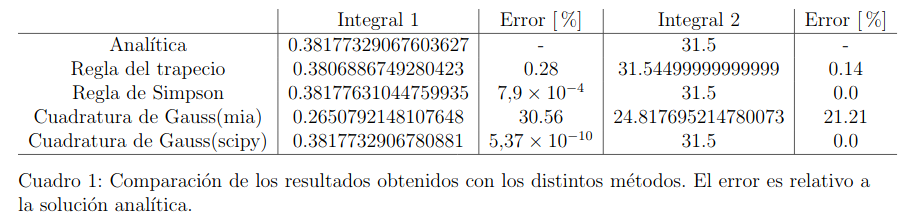

In [133]:
Image("/home/eva/Desktop/INAOE-2020/Computo_Estadistica/tarea-4/integracion.png")

El método del trapecio es el más sencillo de implementar y funciona bien, con errores menores al 1%, aun usando pocos puntos. Por lo que parece conveniente y eficiente. Aunque su eficiencia y precisión también depende de la forma de la función. Por ejemplo, al integrar $B_{\lambda}$ para los distintos tipos espectrales con una escala logarítmica para la longitud de onda, el método del trapecio tiene problemas para muestrar con pocos puntos los intervalos relevantes. Había que cambiar 'a ojo' el rango de longitud de onda para obtener un resultado preciso, lo que no es un uso deseable.

Otro método que también es bastante sencillo de implementar y ofrece buenos resultados, es el de la regla de Simpson. Junto con la regla del trapecio, este es un método que tabula la función en espacios igualmente espaciados. 

De acuerdo con algunas fuentes*, el mejor método numérico de integración es el de cuadratura gaussiana, en el caso en que se conocen las funciones analíticamente. Una de sus ventajas es que no requiere de tabular las funciones a intervalos uniformes. Las abcisas donde evalúa la función son elegidas, y en teoría produce las aproximaciones más precisas posibles. Aunque, como ya vimos, no a todos nos sale la implementación y nos resulta más fácil subirle el número de puntos al trapecio o a la regla de Simpson. 



*https://mathworld.wolfram.com/NumericalIntegration.html

# Flujo integrado
Usando las observaciones realizadas con el Gran Telescopio Milimetrico Alfonso Serrano en la dirección del la zona central de la galaxia M82, se explora el espectro en la banda de 3 mm. 


In [8]:
#AllM82.tar
# Realizar un codigo que lea los diferentes ficheros y hacer uso de la informacion de la cabecera
#para representar graficamente la temperatura de antena frente a la frecuencia.
#pandas!!!  +matplotlib
# Import packages
import cmasher as cmr
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import pandas as panda


In [9]:
f0 = fits.open ("Std_M82_0.fits")
f00 = f0[0]
f1 = fits.open ("Std_M82_1.fits")
f10 = f1[0]
f2 = fits.open ("Std_M82_2.fits")
f20 = f2[0]
f3 = fits.open ("Std_M82_3.fits")
f30 = f3[0]
f4 = fits.open ("Std_M82_4.fits")
f40 = f4[0]
f5 = fits.open ("Std_M82_5.fits")
f50 = f5[0]


print(f0[0].shape,f1[0].shape,f2[0].shape,f3[0].shape,f4[0].shape,f5[0].shape) 
print('\n')
#print (f3[0].header)  
#print (f3[0].header['CRVAL1'])  
#print (f3[0].header['CDELT1'])  #paso en frecuencia con 256 pasos.
#print (f3[0].header['CTYPE1']) 
#print (f3[0].header['BUNIT']) 

print("Valores iniciales de frecuencia de cada archivo:\n")
print (f0[0].header['CRVAL1'], 'GHz')  
print (f1[0].header['CRVAL1'], 'GHz')
print (f2[0].header['CRVAL1'], 'GHz')
print (f3[0].header['CRVAL1'], 'GHz')
print (f4[0].header['CRVAL1'], 'GHz')
print (f5[0].header['CRVAL1'], 'GHz')


(256,) (256,) (256,) (256,) (256,) (256,)


Valores iniciales de frecuencia de cada archivo:

71.7195 GHz
85.4117 GHz
78.0195 GHz
90.6155 GHz
104.3077 GHz
96.9155 GHz


In [10]:
#f3[0].data
# FILE 0
fstep0 = f00.header['CDELT1']
finit0 = f00.header['CRVAL1']
fstop0 = finit0+(fstep0*256)            
Freq0=np.arange(finit0, fstop0, fstep0) #np.array

# FILE 1
fstep1 = f10.header['CDELT1']
finit1 = f10.header['CRVAL1']
fstop1 = finit1+(fstep1*256)            
Freq1  = np.arange(finit1, fstop1, fstep1) 

# FILE 2
fstep2 = f20.header['CDELT1']
finit2 = f20.header['CRVAL1']
fstop2 = finit2+(fstep2*256)            
Freq2  = np.arange(finit2, fstop2, fstep2) 


# FILE 3
fstep3 = f30.header['CDELT1']
finit3 = f30.header['CRVAL1']
fstop3 = finit3+(fstep3*256)            
#print(fstop3)
Freq3=np.arange(finit3, fstop3, fstep3) #np.array

# FILE 4
fstep4 = f40.header['CDELT1']
finit4 = f40.header['CRVAL1']
fstop4 = finit4+(fstep4*256)            
Freq4=np.arange(finit4, fstop4,fstep4)

#FILE 5
fstep5 = f50.header['CDELT1']
finit5 = f50.header['CRVAL1']
fstop5 = finit5+(fstep5*256)            
Freq5  = np.arange(finit5, fstop5,fstep5)


Se emplea un factor de conversión de 7 Jy $K^{-1}$ para convertir la densidad de flujo a temperatura de antena $T_{A*}$ dado por Yun et. al. 2015.

http://tiny.cc/f4rrsz
    

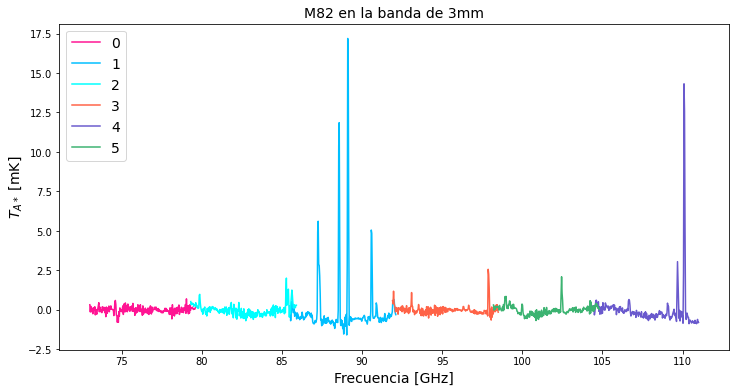

In [100]:
# FILE 3 plot
plt.figure(figsize=(12,6)) 

jy_to_mK = 0.14285714285*1000   

plt.plot(Freq0,f00.data*jy_to_mK, label=0, color='deeppink')
plt.plot(Freq1,f10.data*jy_to_mK, label=1,color='deepskyblue')
plt.plot(Freq2,f20.data*jy_to_mK, label=2,color='cyan')
plt.plot(Freq3,f30.data*jy_to_mK, label=3,color='tomato')
plt.plot(Freq4,f40.data*jy_to_mK, label=4,color='slateblue')
plt.plot(Freq5,f50.data*jy_to_mK, label=5,color='mediumseagreen')


plt.xlabel('Frecuencia [GHz]', fontsize=14)
plt.ylabel('$T_{A*}$ [mK]', fontsize=14)
plt.title('M82 en la banda de 3mm', fontsize=14)
plt.legend(loc='upper left', fontsize='14')

plt.savefig("spectre.png")


El continuo está en:  -0.5714285714 mK, en el archivo 1.



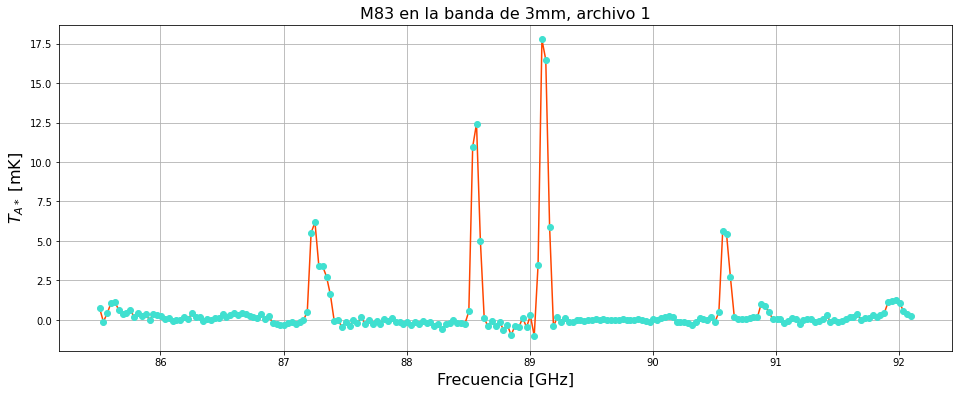

In [114]:
# Integrando líneas
plt.figure(figsize=(16,6)) 
#plt.plot(Freq1,f10.data*jy_to_mK, label='',color='deepskyblue')
#plt.plot(Freq1,f10.data*jy_to_mK,'o',color='turquoise')

plt.xlabel('Frecuencia [GHz]', fontsize=16)
plt.ylabel('$T_{A*}$ [mK]', fontsize=16)
plt.title('M83 en la banda de 3mm, archivo 1', fontsize=16)
#plt.xlim(89.2,90)
#plt.legend(loc='upper left', fontsize='14')

#restamos el continuo
M82_1 = f10.data*jy_to_mK
#type(M82_1)
#print(M82_1)

c=np.where((Freq1 > 89.3) & (Freq1 < 90) )
continuo = np.median(M82_1[c])
print('El continuo está en: ',continuo, 'mK, en el archivo 1.\n')
#print(type(c))
plt.plot(Freq1,M82_1-continuo, label='',color='orangered')
plt.plot(Freq1,M82_1-continuo,'o',color='turquoise')
plt.grid()
#np.where(F_o==90) # x está en cm originalmente
plt.savefig("lines-1.png")


Usar la tabla 2 del artículo de Snell et al. (2011, AJ, 141, 38) para identificar 5 líneas
brillantes que aparecen en el espectro global teniendo en cuenta el corrimiento al rojo
de la galaxia.

https://iopscience.iop.org/article/10.1088/0004-6256/141/2/38/pdf

El continuo está en:  -0.328571428555 mK

Intensity:  14.31428571357 mK
 110.08895 GHz


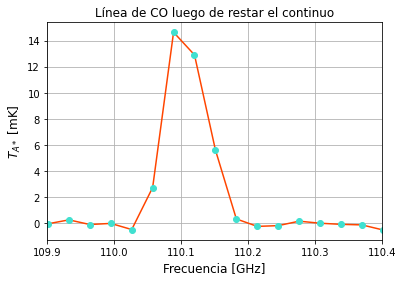

In [217]:
M82_4 = f40.data*jy_to_mK
#type(M82_4)
#print(M82_4)
#print(Freq4)

c4=np.where((Freq4 > 108) & (Freq4 < 109) )
conti4 = np.median(M82_4[c4])
print('El continuo está en: ',conti4, 'mK\n')
#print(type(c4))
plt.plot(Freq4,M82_4-conti4, label='',color='orangered')
plt.plot(Freq4,M82_4-conti4,'o',color='turquoise')
plt.title('Línea de CO luego de restar el continuo')
plt.xlabel('Frecuencia [GHz]', fontsize=12)
plt.ylabel('$T_{A*}$ [mK]', fontsize=12)

plt.xlim(109.9,110.4)
plt.grid()


#Para hallar valor máximo de T_A*
#max5 = np.where(M82_4[c4]==np.max(M82_4[c4]))
m4 =np.where((Freq4 > 109.9) & (Freq4 < 110.4) )
imax=np.where(M82_4[m4] == np.max(M82_4[m4]) )
CO_max= np.max(M82_4[m4])

#fimax=np.where()
print('Intensity: ',CO_max, 'mK\n', Freq4[185], 'GHz')



Los perfiles de las 5 líneas brillantes elegidas:


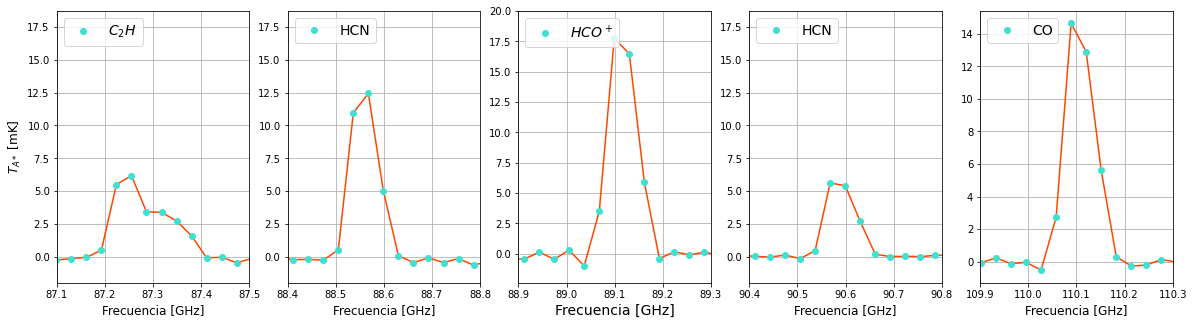

In [245]:

plt.subplot(151)
plt.ylabel('$T_{A*}$ [mK]', fontsize=12)
plt.xlabel('Frecuencia [GHz]', fontsize=12)
plt.plot(Freq1,M82_1-continuo,color='orangered')
plt.plot(Freq1,M82_1-continuo,'o',color='turquoise',label='$C_2 H$')#' 87.3169')
#plt.ylim(-0.1,7.5)
plt.xlim(87.1,87.5)
plt.legend(loc='upper left', fontsize='14')
plt.grid()

plt.subplot(152)
plt.xlabel('Frecuencia [GHz]', fontsize=12)
plt.plot(Freq1,M82_1-continuo, label='',color='orangered')
plt.plot(Freq1,M82_1-continuo,'o',color='turquoise', label='HCN')# 88.6318')
#plt.ylim(0,10)
plt.xlim(88.4,88.8)
plt.legend(loc='upper left', fontsize='14')
plt.grid()

plt.subplot(153)
plt.xlabel('Frecuencia [GHz]', fontsize=14)

plt.plot(Freq1,M82_1-continuo, label='',color='orangered')
plt.plot(Freq1,M82_1-continuo,'o',color='turquoise', label='$HCO^+$')#' 89.1885')
plt.ylim(-2.4,20)
plt.xlim(88.9,89.3)
plt.legend(loc='upper left', fontsize='14')
plt.grid()

plt.subplot(154)
plt.xlabel('Frecuencia [GHz]', fontsize=12)
plt.plot(Freq1,M82_1-continuo, label='',color='orangered')
plt.plot(Freq1,M82_1-continuo,'o',color='turquoise', label='HCN')# 90.6635')
plt.legend(loc='upper left', fontsize='14')
#plt.ylim(0,10)
plt.xlim(90.4,90.8)
plt.grid()

plt.subplot(155)
plt.xlabel('Frecuencia [GHz]', fontsize=12)
plt.plot(Freq4,M82_4-conti4, label='',color='orangered')
plt.plot(Freq4,M82_4-conti4,'o',color='turquoise', label='CO')
plt.xlim(109.9,110.3)
plt.legend(loc='upper left', fontsize='14')
plt.grid()

plt.gcf().set_size_inches(20,5)
plt.savefig("lines-2.png")

print('\nLos perfiles de las 5 líneas brillantes elegidas:')


C2H-Intensity:  6.185714285405001 mK

HCN-Intensity:  12.42857142795 mK

HCO-Intensity:  17.757142856255 mK

HCN-Intensity:  5.628571428290001 mK

CO-Intensity:  14.642857142125 mK


Flujos integrados [mK GHz]:
 0.7205357142496877 0.8511160713860157 1.3136160713628906 0.4609374999769531 1.101339285659219


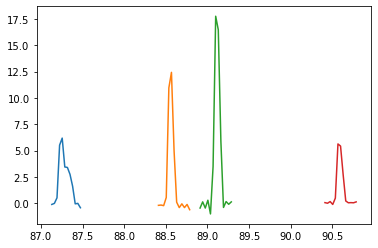

In [243]:
#Flujo integrado e intensidad:
#1
#plt.xlim(87.1,87.5)
index_1=np.where((Freq1 > 87.1) & (Freq1 < 87.5) )
L1_x = Freq1[index_1]
L1_y = M82_1[index_1]-continuo
plt.plot(L1_x,L1_y)
F_int1 = np.trapz(L1_y,L1_x)

imax=np.where(M82_1[index_1] == np.max(M82_1[index_1]) )
C2H_max= np.max(M82_1[index_1])-continuo
print('\nC2H-Intensity: ',C2H_max, 'mK\n')

#2
#plt.xlim(88.4,88.8)
index_2=np.where((Freq1 > 88.4) & (Freq1 < 88.8) )
L2_x = Freq1[index_2]
L2_y = M82_1[index_2]-continuo
plt.plot(L2_x,L2_y)
F_int2 = np.trapz(L2_y,L2_x)

imax=np.where(M82_1[index_2] == np.max(M82_1[index_2]) )
HCN_max= np.max(M82_1[index_2])-continuo
print('HCN-Intensity: ',HCN_max, 'mK\n')

#3
#plt.xlim(88.9,89.3)
index_3=np.where((Freq1 > 88.9) & (Freq1 < 89.3) )
L3_x = Freq1[index_3]
L3_y = M82_1[index_3]-continuo
plt.plot(L3_x,L3_y)
F_int3 = np.trapz(L3_y,L3_x)

imax=np.where(M82_1[index_3] == np.max(M82_1[index_3]) )
HCO_max= np.max(M82_1[index_3])-continuo
print('HCO-Intensity: ',HCO_max, 'mK\n')

#4
#plt.xlim(90.4,90.8)
index_4=np.where((Freq1 > 90.4) & (Freq1 < 90.8) )
L4_x = Freq1[index_4]
L4_y = M82_1[index_4]-continuo
plt.plot(L4_x,L4_y)
F_int4 = np.trapz(L4_y,L4_x)

imax=np.where(M82_1[index_4] == np.max(M82_1[index_4]) )
HCN2_max= np.max(M82_1[index_4])-continuo
print('HCN-Intensity: ',HCN2_max, 'mK\n')

#4
#plt.xlim(109.9,110.3)
index_5=np.where((Freq4 > 109.9) & (Freq4 < 110.3) )
L5_x = Freq4[index_5]
L5_y = M82_4[index_5]-conti4
#plt.plot(L5_x,L5_y)
F_int5 = np.trapz(L5_y,L5_x)

m4 =np.where((Freq4 > 109.9) & (Freq4 < 110.4) )
imax=np.where(M82_4[m4] == np.max(M82_4[m4]) )
CO_max= np.max(M82_4[m4])-conti4
print('CO-Intensity: ',CO_max, 'mK\n') #, Freq4[185], 'GHz') #### Calculo intensidades en mK:

print('\nFlujos integrados [mK GHz]:\n', F_int1, F_int2,F_int3,F_int4, F_int5 )
#M82_1[m1]

#La velocidad radial de M82 es 203 km/s 
http://ned.ipac.caltech.edu/cgi-bin/objsearch?objname=m82&extend=no&hconst=73&omegam=0.27&omegav=0.73&corr_z=1&out_csys=Equatorial&out_equinox=J2000.0&obj_sort=RA+or+Longitude&of=pre_text&zv_breaker=30000.0&list_limit=5&img_stamp=YES

#### Intesidad de las líneas.

Intensidad dada como el máximo de la temperatura de antena ($T_{A*}$) para cada línea en mK.

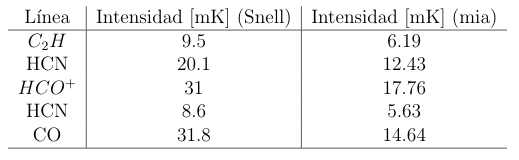

In [244]:
Image('/home/eva/Desktop/INAOE-2020/Computo_Estadistica/tarea-4/intesidad.png')

#Poner nuestro punto (dados los cocientes de líneas medidos) en el diagrama de diagnóstico. 
#Cocientes de flujos integrados.



# Radiación de Cuerpo Negro

Un cuerpo negro es un objeto idealizado que absorbe toda la radiación incidente.
Cuando se encuentra en equilibrio térmico (tiene T constante) la radiación absorbida cumple que:

* Los fotones absorbidos interactuan entre ellos y con la materia del BB.
* Esta interacción cambia la temperatura del objeto.
* En equilibrio térmico, el número de fotones emitidos, absorbidos y dispersados alcanzan un equilibrio.
* Así, la distribución de fotones, es decir el número de fotones con cierta energía, alcanza el equilibrio.

Esto significa que su emisión de energía puede modelarse por un espectro electromagnético que está caracterizado por su temperatura.

La radiación emitida por el BB está descrita por la ley de Planck, que depende de la temperatura $T$ del cuerpo y nos da la cantidad de energía radiaia por unidad de área, por unidad de longitud de onda, por unidad de ángulo sólido para una temperatura dada. 
Sus unidades en cgs son  [erg s$^{-1}$ cm$^{-2}$ cm$^{-1}$ sr^$-1$] = [erg s$^{-1}$ cm$^{-3}$ sr^$-1$].

$$
B_{\lambda}=\frac{2hc^2}{\lambda^5}\left(\frac{1}{\exp\left(\frac{hc}{\lambda k_{b}T}\right)-1}\right)
$$

O expresado en términos de la frecuencia:

$$
B_{\nu}=\frac{2h\nu^3}{c^2}\left(\frac{1}{\exp\left(\frac{h\nu}{k_{b}T}\right)-1}\right)
$$

A continuación se presenta la emisión de cuerpo negro para estrellas tipo O, B, A, F, G y K teniendo en cuenta las diferentes temperaturas que se muestran en la tabla:

https://astro.unl.edu/naap//hr/hr_background1.html

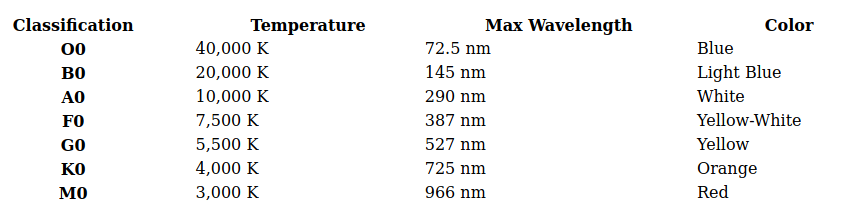

In [140]:
Image("/home/eva/Desktop/INAOE-2020/Computo_Estadistica/tarea-4/tipos.png")

In [124]:
# Librerias y unidades
import numpy as np
import matplotlib.pyplot as plt
# matplotlib inline
from IPython.display import Image
import matplotlib.colors as mcolors
import pandas as panda

# Constants - cgs units
AU = 1.49597870e+13  # cm 
MSun = 1.98911e+33   # g 
RSun = 6.955e10
Mearth = 5.99219e+27 # g
Rearth = 6.371e+8    # cm
SecInDay = 86400.
SecInYear = SecInDay*365.25
kB=1.3807e-16       # erg / K 
avro=6.022141e+23   # particles per mole
Lsun=3.839e+33      # erg/s
sigmaB = 5.6704e-5  # erg / cm^2 / s / K^4
h = 6.6260755e-27   # erg s 
c = 2.99e10         # cm/s


In [125]:
# La funcion que calcula el BB recibe longitud de onda en cm y temperatura en K.
def B_lambda(wavelength,T):
    """
    Receives:
    wavelength -> wavelength (in cm) for Planck's formula
    T -> Blackbody Temperature [Kelvin]
    
    returns B_lambda in [ erg s^{-1} cm^{-2} sr^{-1} cm^{-1} ]
    """
    return 2. * h * c**2 / wavelength**5 * (1.0 / ( np.exp(h*c/(wavelength*kB*T)) - 1.0 ) ) 

En la misma gráfica de la emisión de las estrellas se les compara con los perfiles de distintos instrumentos.
Todos los perfiles se han obtenido del sitio http://voservices.net/filter/filterfindadv.aspx 

Del survey COMBO-17 se emplearon los filtros U, B, V, R, I. *

Del telescopio ultraviolesta GALEX (galaxy evolution explorer) los filtros NUV y FUV. **

De PHAT (Panchromatic Hubble Andromeda Treasury) los filtros H, J y K, que corresponden a HST. ***


\* https://www2.mpia-hd.mpg.de/COMBO/

** http://www.galex.caltech.edu/

*** https://astro.berkeley.edu/research-facilities/projects/phat/

In [126]:
#Leo archivos de filtros
from astropy.io import ascii
#COMBO 17
B = ascii.read('Combo_17_B.txt', names=['WB','TB'], delimiter=' ') ## checar que los filtros estan en Angstroms >> nm
U = ascii.read('Combo_17_U.txt', names=['WU','TU'], delimiter=' ')
I = ascii.read('Combo_17_I.txt', names=['WI','TI'], delimiter=' ')
V = ascii.read('Combo_17_V.txt', names=['WV','TV'], delimiter=' ')
R = ascii.read('Combo_17_R.txt', names=['WR','TR'], delimiter=' ')
#Guardo columnas en variables 
BW = B['WB']  
BT = B['TB']
UW = U['WU']  
UT = U['TU']
IW = I['WI']  
IT = I['TI']
VW = V['WV']  
VT = V['TV']
RW = R['WR']  
RT = R['TR']

#GALEX
FUV = ascii.read('GALEX_FUV.txt', names=['WFUV','TFUV'], delimiter=' ')
NUV = ascii.read('GALEX_NUV.txt', names=['WNUV','TNUV'], delimiter=' ')
FUVW = FUV['WFUV']
FUVT = FUV['TFUV']
NUVW = NUV['WNUV']
NUVT = NUV['TNUV']

#PHAT
H = ascii.read('PHAT_H.txt', names=['WH','TH'], delimiter=' ')
J = ascii.read('PHAT_J.txt', names=['WJ','TJ'], delimiter=' ')
K = ascii.read('PHAT_K.txt', names=['WK','TK'], delimiter=' ')
#print(V.colnames)
HW = H['WH']  
HT = H['TH']
JW = J['WJ']  
JT = J['TJ']
KW = K['WK']  
KT = K['TK']





Emisión de cuerpo negro para diferentes tipos espectrales junto con los perfiles de distintos filtros:


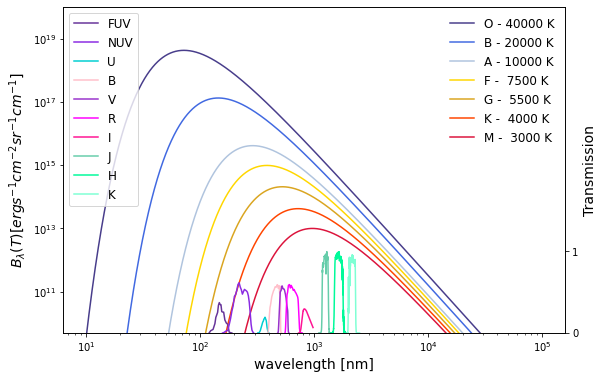

In [128]:
# Temperaturas en K
Teff_Sun = 5777.0
TO = 40000.
TB = 20000.
TA = 10000.
TF = 7500.
TG = 5500.
TK = 4000.
TM = 3000.
cm_to_nm = 1e-2*1e9

# Se define la longitud de onda [cm] 
x = np.logspace(-6,-2,5000)

fig, ax1 = plt.subplots(figsize=(9,6))
ax1.plot(x*cm_to_nm ,B_lambda(x,TO), label='O - 40000 K',color='darkslateblue')
ax1.plot(x*cm_to_nm ,B_lambda(x,TB), label='B - 20000 K',color='royalblue')
ax1.plot(x*cm_to_nm ,B_lambda(x,TA), label='A - 10000 K',color='lightsteelblue')
ax1.plot(x*cm_to_nm ,B_lambda(x,TF), label='F -  7500 K',color='gold')
ax1.plot(x*cm_to_nm ,B_lambda(x,TG), label='G -  5500 K',color='goldenrod')
ax1.plot(x*cm_to_nm ,B_lambda(x,TK), label='K -  4000 K',color='orangered')
ax1.plot(x*cm_to_nm ,B_lambda(x,TM), label='M -  3000 K',color='crimson')

ax1.loglog()
ax1.set_ylim(5e9,1e20)
ax1.set_xlabel('wavelength [nm]', fontsize=14)
ax1.set_ylabel(r'$B_{\lambda}(T)  [erg s^{-1} cm^{-2} sr^{-1} cm^{-1}]$', fontsize=14)  # we can use latex math notation in our axis labels
ax1.legend(frameon=False,fontsize=12)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Transmission',fontsize=14)
ax2.set_ylim(0,4)
ax2.set_yticks(np.arange(0, 2, 1))
#galex
ax2.semilogx(FUVW*0.1,FUVT, label='FUV',color='rebeccapurple')
ax2.semilogx(NUVW*0.1,NUVT, label='NUV',color='blueviolet')
#combo17
ax2.semilogx(UW*0.1,UT, label='U',color='darkturquoise')
ax2.semilogx(BW*0.1,BT, label='B',color='pink')
ax2.semilogx(VW*0.1,VT, label='V',color='darkorchid')
ax2.semilogx(RW*0.1,RT, label='R',color='magenta')
ax2.semilogx(IW*0.1,IT, label='I',color='deeppink')

#phat
ax2.semilogx(JW*0.1,JT, label='J',color='mediumaquamarine')
ax2.semilogx(HW*0.1,HT, label='H',color='mediumspringgreen')
ax2.semilogx(KW*0.1,KT, label='K',color='aquamarine')

ax2.legend(frameon=True,fontsize=12, loc='upper left')
plt.savefig("filter.png")

#fig.tight_layout()
#plt.show()

print('\n\nEmisión de cuerpo negro para diferentes tipos espectrales junto con los perfiles de distintos filtros:')


#### Discusión sobre el uso de los distintos filtros.

Como podemos observar cada filtro apenas cubre un rango pequeño de longitudes de onda cuando se le compara con la emisión de energía completa de las estrellas. Para estudiar aquellas menos calientes como las de tipo K y M, conviene emplear observaciones entre el visible y el cercano infrarrojo.
Mientras más calientes habría que emplear, además de observaciones en óptico, instrumentos que detecten longitudes de onda en UV, como es el caso del satélie GALEX o ir hacia longitudes de onda aún más cortas, en el rango de los rayos X. 

## Ley de Wien.
Esta ley establece que hay una relación inversa entre la longitud de onda en la que se sucede el máximo de emisión de un cuerpo negro y su temperatura, de acuerdo a la relación,
$$
\lambda_{máx} = \frac{2.8976\times10^{6} [nm  K]}{T}
$$
Para comprobar que esta relación se cumple comparamos la longitud de onda a la que sucede el máximo de la distribución de energía, obtenida a partir de la función ```B_lambda(wavelength,T)```;
con el mismo valor obtenido a partir de la relación anterior, para cada tipo espectral. 


Comprobamos que la ley de Wien se cumple: 


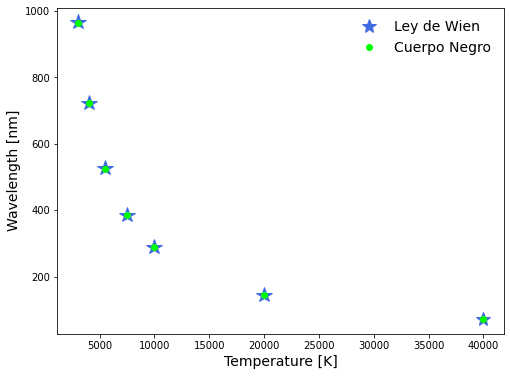

In [130]:
# Ley de Wien con Lambda en nm
def L_max(T):
    return 2.8976e6/T


plt.figure(figsize=(8,6))    
plt.plot(TO,L_max(TO),'*',color='royalblue', label='Ley de Wien',markersize="14")
plt.plot(TB,L_max(TB),'*',color='royalblue',markersize="16")
plt.plot(TA,L_max(TA),'*',color='royalblue',markersize="16")
plt.plot(TF,L_max(TF),'*',color='royalblue',markersize="16")
plt.plot(TG,L_max(TG),'*',color='royalblue',markersize="16")
plt.plot(TK,L_max(TK),'*',color='royalblue',markersize="16")
plt.plot(TM,L_max(TM),'*',color='royalblue',markersize="16")

#plt.plot(TO, 


F_o = np.asarray(B_lambda(x,TO))
i_o = np.where(F_o==np.max(F_o)) # x está en cm originalmente
#print(i, F_o[i_o], x[i_o]*cm_to_nm, 'nm\n')
F_b = np.asarray(B_lambda(x,TB))
i_b = np.where(F_b==np.max(F_b)) # x está en cm originalmente
#print(i, F_b[i_b], x[i_b]*cm_to_nm, 'nm\n')
F_a = np.asarray(B_lambda(x,TA))
i_a = np.where(F_a==np.max(F_a))
F_f = np.asarray(B_lambda(x,TF))
i_f = np.where(F_f==np.max(F_f))
F_g = np.asarray(B_lambda(x,TG))
i_g = np.where(F_g==np.max(F_g))
F_k = np.asarray(B_lambda(x,TK))
i_k = np.where(F_k==np.max(F_k))
F_m = np.asarray(B_lambda(x,TM))
i_m = np.where(F_m==np.max(F_m))


plt.plot(TO,x[i_o]*cm_to_nm,'o',color='lime', label='Cuerpo Negro')
plt.plot(TB,x[i_b]*cm_to_nm,'o',color='lime')
plt.plot(TA,x[i_a]*cm_to_nm,'o',color='lime')
plt.plot(TF,x[i_f]*cm_to_nm,'o',color='lime')
plt.plot(TG,x[i_g]*cm_to_nm,'o',color='lime')
plt.plot(TK,x[i_k]*cm_to_nm,'o',color='lime')
plt.plot(TM,x[i_m]*cm_to_nm,'o',color='lime')

plt.xlabel('Temperature [K]', fontsize=14)
plt.ylabel('Wavelength [nm]', fontsize=14)

plt.legend(frameon=False, fontsize=14)
plt.savefig("wien.png")
print('\nComprobamos que la ley de Wien se cumple: ')

## Ley de Stefan-Boltzmann

La ley de Stefan-Boltzmann establece que la energía emitida por un cuerpo negro por unidad de área y por unidad de tiempo es proporcional a la cuarta potencia de su temperatura absoluta.

\begin{equation}
   \pi  \int_{0}^{\infty} B_\lambda (\lambda, T) = \sigma T^4
\end{equation}


a la constante de proporcionalidad se le llama constante de Stefan-Boltzmann. En cgs, 

$$σ ≈ 5.6704×10^{−5}  erg⋅cm^{−2}⋅s^{−1}⋅K^{−4} $$

In [20]:
# Ley de Stefan-Boltzmann   sigma en [erg / cm^2 / s / K^4]'
def SB(T):
    return sigmaB*(T**4)

#Int_SB = SB(TG)
#print(sigmaB, TG**4,'[K]', SB(TG))
#print("% 10.3E"%(SB(TG)))

In [21]:
#Cuerpo negro que toma la temperatura por fuera
def B_lambda2(wavelength):
    return 2. * h * c**2 / wavelength**5 * (1.0 / ( np.exp(h*c/(wavelength*kB*Tamperatura)) - 1.0 ) ) 

In [22]:
xx = np.logspace(-6,0,500)
#Tamperatura = TG
#SB_G = trapecio(B_lambda2, 1e-6,1, 500000)  
## Como la función trapecio muestrea el intervalo [a,b] de forma lineal, 
# para integrar sobre un intervalo logarítmico hay que usar muchos puntos. 

#print("% 10.3E"%(SB_G))
#print(xx, B_lambdSa2(xx))
#plt.plot(xx, B_lambda2(xx),'o')
#plt.loglog()
Tamperatura = TO
SB_OO = np.trapz(B_lambda2(xx),xx)
errorSB=100*(SB_OO*np.pi -SB(TO)) / SB(TO)
print('SB(O):', "% 10.3E"%(SB_OO*np.pi), '~',"%10.3E"%(SB(TO)),'%7.2f' % (errorSB),'%')

Tamperatura = TB
SB_BB = np.trapz(B_lambda2(xx),xx)
errorSB=100*(SB_BB*np.pi -SB(TB)) / SB(TB)
print('SB(B):', "% 10.3E"%(SB_BB*np.pi), '~',"%10.3E"%(SB(TB)),'%7.2f' % (errorSB),'%')

Tamperatura = TA
SB_AA = np.trapz(B_lambda2(xx),xx)
print('SB(A):', "% 10.3E"%(SB_AA*np.pi), '~',"%10.3E"%(SB(TA)))

Tamperatura = TF
SB_FF = np.trapz(B_lambda2(xx),xx)
print('SB(F):', "% 10.3E"%(SB_FF*np.pi), '~',"%10.3E"%(SB(TF)))

Tamperatura = TG
SB_GG = np.trapz(B_lambda2(xx),xx)
errorSB=100*(SB_GG*np.pi -SB(TG)) / SB(TG)
print('SB(G):',"%10.3E"%(SB_GG*np.pi), '~',"% 10.3E"%(SB(TG)), '%7.2f' % (errorSB),'%')

Tamperatura = TK
SB_KK = np.trapz(B_lambda2(xx),xx)
print('SB(K):', "% 10.3E"%(SB_KK*np.pi), '~',"%10.3E"%(SB(TK)))

Tamperatura = TM
errorSB=0
SB_MM = np.trapz(B_lambda2(xx),xx)
errorSB=100*(SB_MM*np.pi -SB(TM)) / SB(TM)
print('SB(M):', "% 10.3E"%(SB_MM*np.pi), '~',"%10.3E"%(SB(TM)), '%7.2f' % (errorSB),'%')


SB(O):  1.460E+14 ~  1.452E+14    0.56 %
SB(B):  9.123E+12 ~  9.073E+12    0.56 %
SB(A):  5.702E+11 ~  5.670E+11
SB(F):  1.804E+11 ~  1.794E+11
SB(G):  5.218E+10 ~  5.189E+10    0.56 %
SB(K):  1.460E+10 ~  1.452E+10
SB(M):  4.619E+09 ~  4.593E+09    0.56 %


In [23]:
errorSB=100*(SB_GG*np.pi -SB(TG)) / SB(TG)
print('Error en la estimación de la ley de Stefan-Boltzmann:%3.2f' % (errorSB), '%')

Error en la estimación de la ley de Stefan-Boltzmann:0.56 %


### Comparación de la estimación de la ley de Boltzmann para las distintas temperaturas consideradas en este trabajo. 

En la columna 1, se muestran los tipos espectrales. En la columna 2 las temperaturas consideradas. En la columna 3, la estimación de la ley de Stefan-Boltzmann obtenida numéricamente para la temperatura correspondiente. En la columna 4, la estimación a partir de multiplicar la constante de Stefan-Boltzmann por la temperatura correspondiente a la cuarta. Se obtuvo un error del 0.56\% en la estimación numérica relativo a la columna 4.

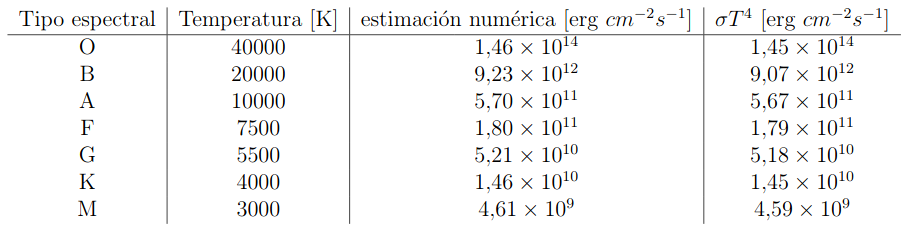

In [137]:
Image("/home/eva/Desktop/INAOE-2020/Computo_Estadistica/tarea-4/SB.png")

# El Sol.

El Sol tiene una temperatura efectiva de $T_{eff} = 5777$ K. 

Para comparar el flujo real con el flujo esperado de un cuerpo negro esférico de radio $R_{\odot} = 6.96\times 10^{10}$ cm, con $T_{\rm eff} = 5770$ K, y que se encuentra a 1 AU, como el Sol.

El flujo ne función de la longitud de onda de tal cuerpo negro queda:
$$
F_{\lambda}( \rm AU) = \pi B_{\lambda} \left(\frac{R_{\odot}}{\rm AU}\right)^{2}
$$

A continuación muestro la gráfica comparativa.

['time (days since 2003-01-24)', 'wavelength (nm)', 'irradiance (W/m^2/nm)']


/home/eva/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, '$F_{\\lambda}$ [ erg s$^{-1}$ cm$^{-3}$]')

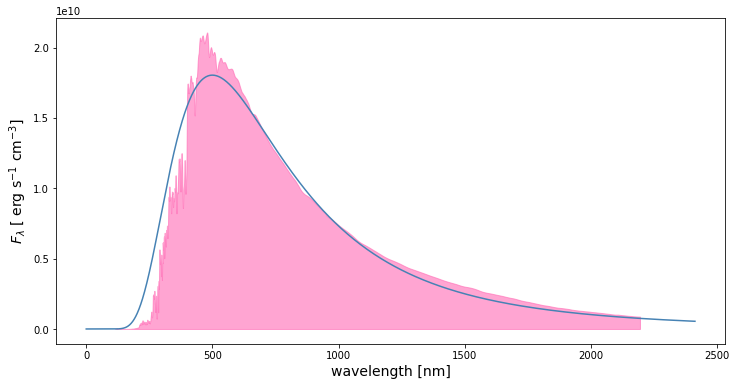

In [186]:
# Constants - cgs units
AU = 1.49597870e+13  # cm 
MSun = 1.98911e+33   # g 
RSun = 6.955e10
Mearth = 5.99219e+27 # g
Rearth = 6.371e+8    # cm
SecInDay = 86400.
SecInYear = SecInDay*365.25
kB=1.3807e-16       # erg / K 
avro=6.022141e+23   # particles per mole
Lsun=3.839e+33      # erg/s
sigmaB = 5.6704e-5  # erg / cm^2 / s / K^4
h = 6.6260755e-27   # erg s 
c = 2.99e10         # cm/s
########################################################3
solar = ascii.read('solar_a.txt')
print(solar.colnames)
wavelength = solar['wavelength (nm)'] # 2a columna
Flux = solar['irradiance (W/m^2/nm)'] # 3er columna

Teff_Sun = 5777.0
Watt_to_erg_s = 1e7 # erg/s
nm_to_cm = 1e-7 # cm
m_to_cm = 1e2

# Convert the flux cgs (We'll leave the wavelength in nm for now)
Flux_cgs = solar['irradiance (W/m^2/nm)']*Watt_to_erg_s/ m_to_cm**2 / nm_to_cm

## El BB
# Flujo de BB con T_eff 5777 K ; R = Rsun ; located at 1 AU
Flux_lambda = np.pi*(B_lambda(wavelength*nm_to_cm,Teff_Sun)*(RSun/AU)**2)
#print(Teff_Sun, wavelength, wavelength*nm_to_cm)
#print(np.pi*(RSun/AU)**2)
#print(B_lambda(wavelength*nm_to_cm,Teff_Sun))

      # LA gráfica
plt.figure(figsize=(12,6))
# Plot BB
plt.plot(wavelength,Flux_lambda, '-',color='steelblue', label=r'Blackbody, $T_{\rm eff}=5777$, $R = R_{\odot}$, $D = 1$ AU')
#plot espectro
plt.fill_between(solar['wavelength (nm)'],Flux_cgs,color='hotpink',alpha=0.6)

plt.xlabel('wavelength [nm]',fontsize = 14)
plt.ylabel(r'$F_{\lambda}$ [ erg s$^{-1}$ cm$^{-3}$]',fontsize = 14)


El flujo de este cuerpo negro es una buena aproximación al flujo del Sol, de la figura se tiene que la longitud de onda donde se alcanza el máximo es la misma para ambas distribuciones. Por supuesto el espectro del Sol se desvía del de un cuerpo negro por la presencia de líneas de emisión/absorción, y porque no es un objeto idealizado; su temperatura si presenta un gradiente.

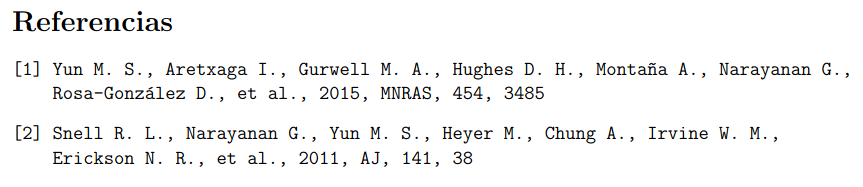

In [141]:
Image("/home/eva/Desktop/INAOE-2020/Computo_Estadistica/tarea-4/referencias.png")